## Import Libraries & Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [2]:
gerard = pd.read_csv("data/gerardtieng_2019_1.csv")

In [3]:
gerard.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1091095912330551297,https://twitter.com/gerardtieng/status/1091095...,@JonathanBice77 https://t.co/wXF61ipAc5,2019-01-31 22:08 +0000,312.0,1.0,0.003205,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-
1,1091057556506722305,https://twitter.com/gerardtieng/status/1091057...,Nobody asked for Cool Ranch Doritos like nobod...,2019-01-31 19:36 +0000,547.0,7.0,0.012797,0.0,2.0,1.0,...,-,-,-,-,-,-,-,-,-,-
2,1091026622105509888,https://twitter.com/gerardtieng/status/1091026...,@LAValiant @SeoulDynasty @Spitfire 👁👁,2019-01-31 17:33 +0000,140.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
3,1090784520847220736,https://twitter.com/gerardtieng/status/1090784...,@jennbojones https://t.co/alE3oViCC1,2019-01-31 01:31 +0000,181.0,1.0,0.005525,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-
4,1090783481192501249,https://twitter.com/gerardtieng/status/1090783...,@jennbojones Welcome to #TeamSCUF.,2019-01-31 01:27 +0000,205.0,2.0,0.009756,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-


In [6]:
for i in np.arange(2, 13):
    df = pd.read_csv("data/gerardtieng_2019_{}.csv".format(i))
    gerard = pd.concat([gerard, df])

In [10]:
gerard.shape

(2040, 40)

## Data Selection

In [16]:
gerard.columns

Index(['Tweet id', 'Tweet permalink', 'Tweet text', 'time', 'impressions',
       'engagements', 'engagement rate', 'retweets', 'replies', 'likes',
       'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands',
       'permalink clicks', 'app opens', 'app installs', 'follows',
       'email tweet', 'dial phone', 'media views', 'media engagements',
       'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements'],
      dtype='object')

In [20]:
gerard = gerard[["Tweet permalink", "Tweet text", "time", "impressions", "engagements", "retweets", "replies", "likes", "user profile clicks"]].copy()

In [21]:
gerard["time"] = pd.to_datetime(gerard["time"])

In [25]:
gerard["hour"] = gerard["time"].dt.hour
gerard["month"] = gerard["time"].dt.month
gerard["dayofweek"] = gerard["time"].dt.dayofweek

In [38]:
gerard_tweets = gerard[~gerard["Tweet text"].str.startswith("@")]
gerard_replies = gerard[gerard["Tweet text"].str.startswith("@")]

## Activity Summary

In [68]:
hour_activity = gerard_tweets.groupby("hour").count()

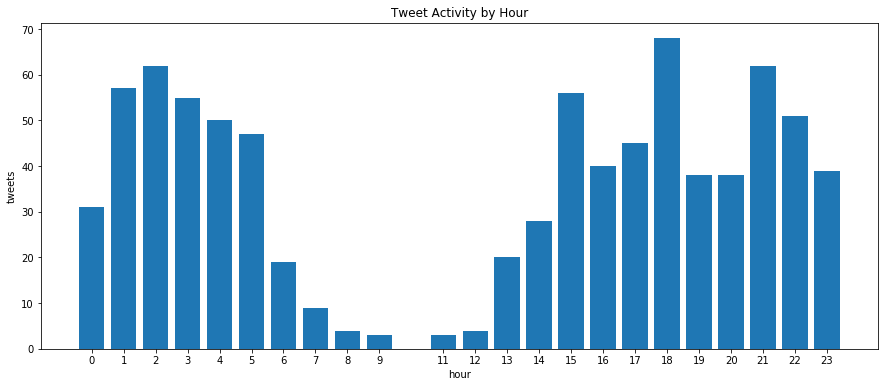

In [91]:
plt.figure(figsize=(15,6))
plt.bar(hour_activity.index, hour_activity["Tweet permalink"], tick_label=hour_activity.index)
plt.xlabel("hour")
plt.ylabel("tweets")
plt.title(f"Tweet Activity by Hour")
plt.show()

In [70]:
day_activity = gerard_tweets.groupby("dayofweek").count()

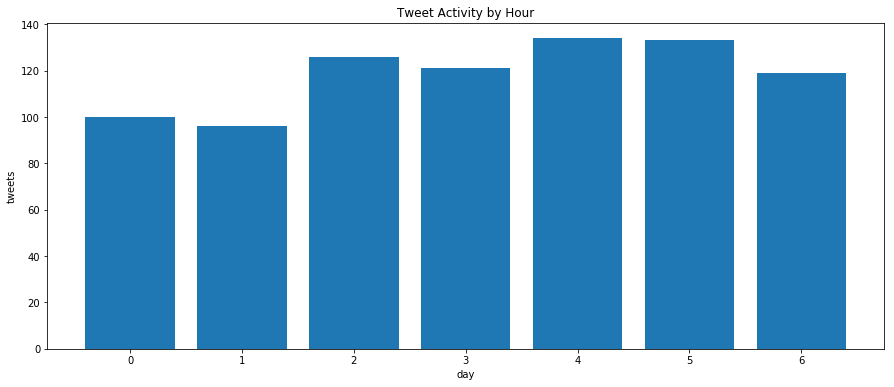

In [71]:
plt.figure(figsize=(15,6))
plt.bar(day_activity.index, day_activity["Tweet permalink"])
plt.xlabel("day")
plt.ylabel("tweets")
plt.title(f"Tweet Activity by Hour")
plt.show()

In [72]:
month_activity = gerard_tweets.groupby("month").count()

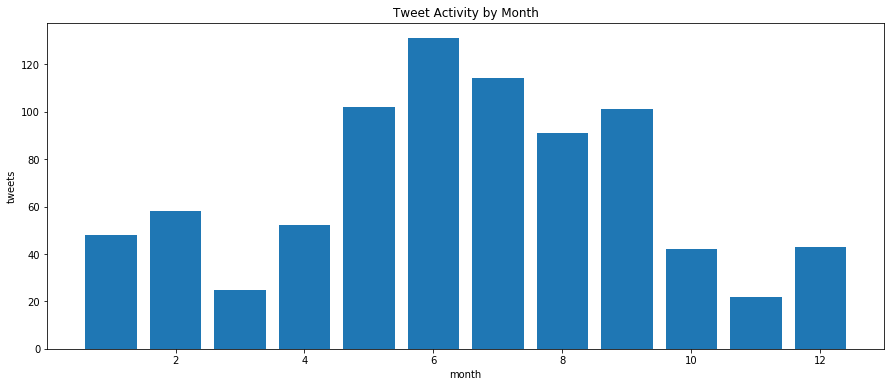

In [75]:
plt.figure(figsize=(15,6))
plt.bar(month_activity.index, month_activity["Tweet permalink"], tick_label=month_activity.i)
plt.xlabel("month")
plt.ylabel("tweets")
plt.title(f"Tweet Activity by Month")
plt.show()

## Engagement Summary

In [51]:
gerard_tweets[["impressions", "engagements", "retweets", "likes", "replies", "user profile clicks"]].sum()

impressions            276277.0
engagements              9487.0
retweets                   88.0
likes                    1735.0
replies                   456.0
user profile clicks       690.0
dtype: float64

In [50]:
gerard_tweets[["impressions", "engagements", "retweets", "likes", "replies", "user profile clicks"]].sum() / gerard_tweets.shape[0]

impressions            333.265380
engagements             11.443908
retweets                 0.106152
likes                    2.092883
replies                  0.550060
user profile clicks      0.832328
dtype: float64

In [41]:
gerard_tweets.sort_values("impressions", ascending=False).head(10)

,Tweet permalink,Tweet text,time,impressions,engagements,retweets,replies,likes,user profile clicks,hour,month,dayofweek
81,https://twitter.com/gerardtieng/status/1151500...,"If you’re not @Brandwatch Influitiving, you’re...",2019-07-17 14:33:00+00:00,23875.0,20.0,1.0,1.0,0.0,8.0,14,7,2
56,https://twitter.com/gerardtieng/status/1096890...,#WeekendReads: The new brand follower report f...,2019-02-16 21:52:00+00:00,4964.0,13.0,1.0,0.0,1.0,5.0,21,2,5
188,https://twitter.com/gerardtieng/status/1139688...,This robot is about to drop the Razor’s Edge o...,2019-06-15 00:19:00+00:00,4643.0,372.0,8.0,4.0,45.0,22.0,0,6,5
2,https://twitter.com/gerardtieng/status/1123249...,If #SonicMovie becomes the #AceVentura Threequ...,2019-04-30 15:34:00+00:00,3447.0,42.0,0.0,0.0,14.0,0.0,15,4,1
120,https://twitter.com/gerardtieng/status/1093522...,Vital knowledge for 2019 from our friends at @...,2019-02-07 14:50:00+00:00,2834.0,20.0,1.0,1.0,1.0,2.0,14,2,3
30,https://twitter.com/gerardtieng/status/1133502...,Bro...how could you leave out Phreak? https://...,2019-05-28 22:38:00+00:00,2621.0,5.0,0.0,1.0,1.0,0.0,22,5,1
48,https://twitter.com/gerardtieng/status/1143607...,Sup nerds https://t.co/IDzjyKqRjv,2019-06-25 19:49:00+00:00,2594.0,90.0,0.0,1.0,13.0,4.0,19,6,1
94,https://twitter.com/gerardtieng/status/1080020...,💍✔️,2019-01-01 08:40:00+00:00,2342.0,129.0,0.0,12.0,22.0,51.0,8,1,1
56,https://twitter.com/gerardtieng/status/1132024...,Any time I get one RT: https://t.co/mwoNpbYV0e,2019-05-24 20:46:00+00:00,2121.0,128.0,7.0,0.0,10.0,0.0,20,5,4
216,https://twitter.com/gerardtieng/status/1146835...,This is your obligatory California “did you fe...,2019-07-04 17:36:00+00:00,1891.0,27.0,0.0,4.0,17.0,4.0,17,7,3


In [43]:
gerard_tweets.sort_values("likes", ascending=False).head(10)

,Tweet permalink,Tweet text,time,impressions,engagements,retweets,replies,likes,user profile clicks,hour,month,dayofweek
188,https://twitter.com/gerardtieng/status/1139688...,This robot is about to drop the Razor’s Edge o...,2019-06-15 00:19:00+00:00,4643.0,372.0,8.0,4.0,45.0,22.0,0,6,5
7,https://twitter.com/gerardtieng/status/1145384...,I’m four beers in at my own wedding tasting. S...,2019-06-30 17:32:00+00:00,810.0,144.0,0.0,2.0,22.0,6.0,17,6,6
94,https://twitter.com/gerardtieng/status/1080020...,💍✔️,2019-01-01 08:40:00+00:00,2342.0,129.0,0.0,12.0,22.0,51.0,8,1,1
216,https://twitter.com/gerardtieng/status/1146835...,This is your obligatory California “did you fe...,2019-07-04 17:36:00+00:00,1891.0,27.0,0.0,4.0,17.0,4.0,17,7,3
153,https://twitter.com/gerardtieng/status/1129099...,Time surely does fly. https://t.co/Pr3EyLo9Fm,2019-05-16 19:01:00+00:00,464.0,84.0,0.0,2.0,17.0,10.0,19,5,3
42,https://twitter.com/gerardtieng/status/1166500...,Your boy did it. @PopeyesChicken Sandwich acqu...,2019-08-27 23:58:00+00:00,497.0,80.0,1.0,3.0,17.0,1.0,23,8,1
37,https://twitter.com/gerardtieng/status/1143700...,Decisions were made. https://t.co/vUk9kr27T8,2019-06-26 02:02:00+00:00,642.0,155.0,0.0,3.0,16.0,11.0,2,6,2
218,https://twitter.com/gerardtieng/status/1138914...,Best moment of #E3 by far. https://t.co/OXi4Ir...,2019-06-12 21:02:00+00:00,1025.0,135.0,2.0,6.0,16.0,2.0,21,6,2
2,https://twitter.com/gerardtieng/status/1123249...,If #SonicMovie becomes the #AceVentura Threequ...,2019-04-30 15:34:00+00:00,3447.0,42.0,0.0,0.0,14.0,0.0,15,4,1
37,https://twitter.com/gerardtieng/status/1194141...,"Ok...Sexy Boy didn’t happen, but we managed to...",2019-11-12 06:36:00+00:00,876.0,67.0,2.0,5.0,13.0,0.0,6,11,1


In [42]:
gerard_tweets.sort_values("retweets", ascending=False).head(10)

,Tweet permalink,Tweet text,time,impressions,engagements,retweets,replies,likes,user profile clicks,hour,month,dayofweek
188,https://twitter.com/gerardtieng/status/1139688...,This robot is about to drop the Razor’s Edge o...,2019-06-15 00:19:00+00:00,4643.0,372.0,8.0,4.0,45.0,22.0,0,6,5
56,https://twitter.com/gerardtieng/status/1132024...,Any time I get one RT: https://t.co/mwoNpbYV0e,2019-05-24 20:46:00+00:00,2121.0,128.0,7.0,0.0,10.0,0.0,20,5,4
214,https://twitter.com/gerardtieng/status/1126686...,Maybe the droids you're looking for is the fri...,2019-05-10 03:12:00+00:00,1040.0,20.0,5.0,0.0,5.0,0.0,3,5,4
31,https://twitter.com/gerardtieng/status/1154990...,This must be how my dogs feel when I do the wa...,2019-07-27 05:41:00+00:00,1692.0,62.0,4.0,1.0,11.0,0.0,5,7,5
27,https://twitter.com/gerardtieng/status/1166893...,I’m Odo on the streets and \nOdo in the sheets...,2019-08-29 02:02:00+00:00,368.0,13.0,3.0,0.0,3.0,0.0,2,8,3
68,https://twitter.com/gerardtieng/status/1131620...,"Jean-Luc Picard: Computer, one chicken dinner....",2019-05-23 18:00:00+00:00,1614.0,21.0,3.0,0.0,10.0,0.0,18,5,3
169,https://twitter.com/gerardtieng/status/1159144...,The only toes I’m sucking on are burri. https:...,2019-08-07 16:48:00+00:00,974.0,99.0,3.0,3.0,9.0,1.0,16,8,2
187,https://twitter.com/gerardtieng/status/1147345...,"Another day, another earthquake. https://t.co/...",2019-07-06 03:23:00+00:00,1548.0,22.0,3.0,2.0,8.0,1.0,3,7,5
37,https://twitter.com/gerardtieng/status/1194141...,"Ok...Sexy Boy didn’t happen, but we managed to...",2019-11-12 06:36:00+00:00,876.0,67.0,2.0,5.0,13.0,0.0,6,11,1
130,https://twitter.com/gerardtieng/status/1171104...,HEY HEY! IT'S TIME TO MAKE SOME CRAZY MONEY! A...,2019-09-09 16:55:00+00:00,1186.0,26.0,2.0,0.0,12.0,2.0,16,9,0


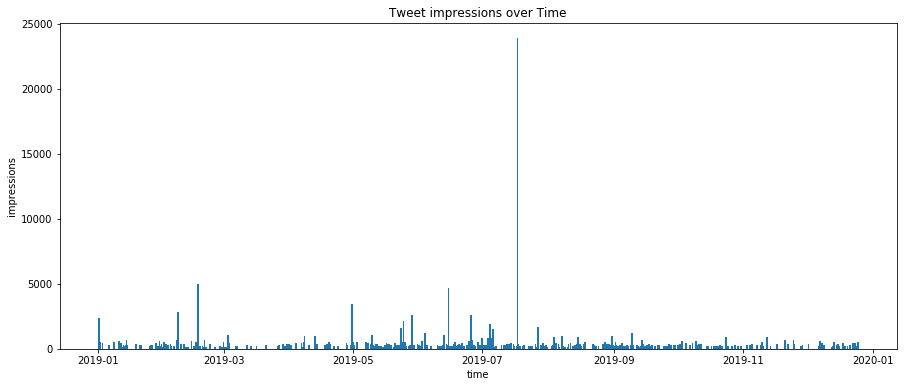

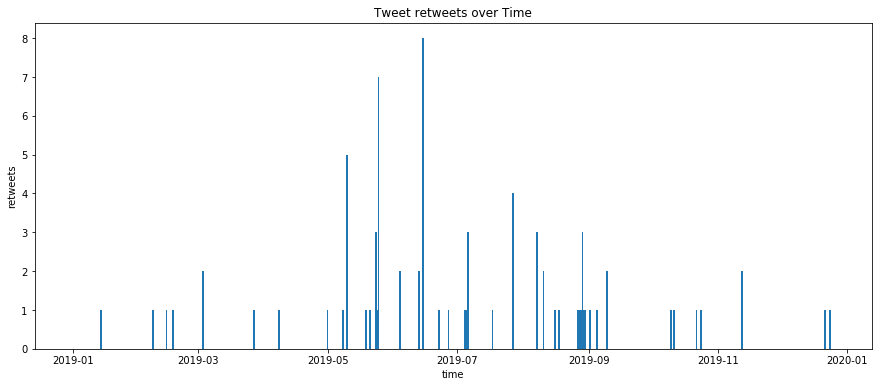

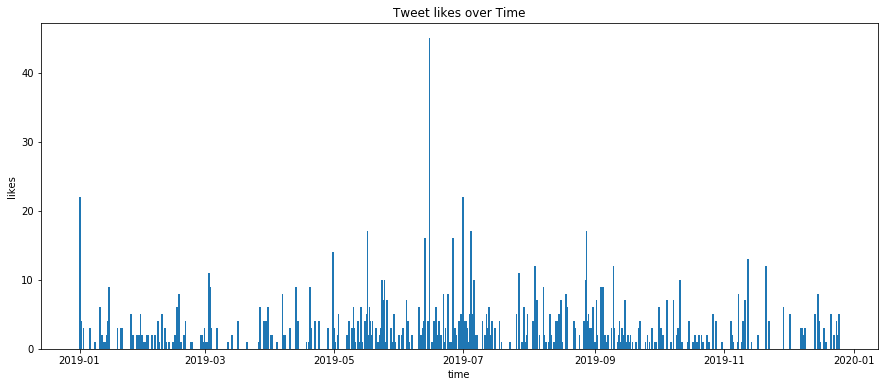

In [39]:
engagement_columns = ["impressions", "retweets", "likes"]

for i in engagement_columns:
    plt.figure(figsize=(15,6))
    plt.bar(gerard_tweets["time"], gerard_tweets[i])
    plt.xlabel("time")
    plt.ylabel(i)
    plt.title(f"Tweet {i} over Time")
    plt.show()